In [1]:
from pathlib import Path 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

import re

In [7]:
folder = Path('./params/N4/Th0.5/epsilon')
for f in folder.iterdir():
    strlist = re.split('C|Th|e',f.name)
    print(strlist[2], strlist[-1].strip('.dat'))
Th = float(re.split('C|Th|e',f.name)[-1].strip('.dat'))

0.1 0.5
0.5 0.5
0.01 0.5
0.05 0.5


In [8]:
plot_folder = "plots/data_distribution/N4/"

In [10]:
C_list = []
percent_seg = []
percent_alt = []
eff = []
ineq = []
eff_er = []
ineq_er = []
for f in folder.iterdir():
    C = re.split('C|Th|e',f.name)[2]
    df = pd.read_table(f, sep="\s+", header=None, names=['efficiency','inequality','n_efficiency','n_inequality','entropy','cond_entropy','frequency','info_per_agent','int_entropy','ineq_slope','emax_perc'])
    C_list.append(C)
    
    mx = df['inequality'].max()
    mn = 0.98*mx
    df_seg = df[(df['inequality']>mn) & (df['cond_entropy']<0.01) & (df['efficiency']>0.98*Th)]
    percent_seg.append(df_seg.shape[0]/df.shape[0])
    #print(df_seg.head())

    mn = 0.02*mx
    df_alt = df[(df['inequality']<mn) & (df['cond_entropy']<0.01) & (df['efficiency']>0.98*Th)]
    percent_alt.append(df_alt.shape[0]/df.shape[0])
    #print(df_alt.head())

    eff.append(df['efficiency'].mean())
    ineq.append(df['inequality'].mean())
    eff_er.append(df['efficiency'].std())
    ineq_er.append(df['inequality'].std())

df_c = pd.DataFrame({'c':C_list, '%seg':percent_seg, '%alt':percent_alt, 'eff':eff, 'ineq':ineq, 'eff_er':eff_er, 'ineq_er':ineq_er})
df_c.c.astype('float')
df_c.sort_values(by='c',inplace=True)
df_c.head()

<>:10: SyntaxWarning: invalid escape sequence '\s'
<>:10: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_90064/1559289435.py:10: SyntaxWarning: invalid escape sequence '\s'
  df = pd.read_table(f, sep="\s+", header=None, names=['efficiency','inequality','n_efficiency','n_inequality','entropy','cond_entropy','frequency','info_per_agent','int_entropy','ineq_slope','emax_perc'])


,c,%seg,%alt,eff,ineq,eff_er,ineq_er
2,0.01,0.0,0.0,0.443833,0.278357,0.024313,0.129141
3,0.05,0.0,0.0,0.411472,0.220132,0.007810,0.096615
0,0.1,0.0,0.0,0.354505,0.171877,0.007426,0.070542
1,0.5,0.0,0.0,0.068791,0.032362,0.007456,0.014007


In [11]:
#df_c['c'].iloc[df_c['eff'].argmax()]

In [12]:
df_c['c']

2    0.01
3    0.05
0     0.1
1     0.5
Name: c, dtype: object

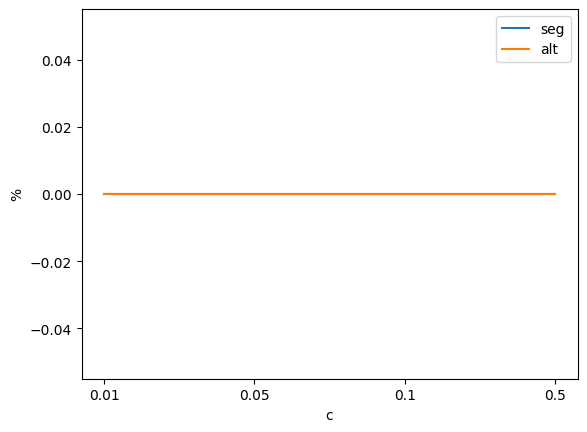

In [13]:
ax = sns.lineplot(x='c',y='%seg',data=df_c,label='seg')
ax.set_ylabel('%')
sns.lineplot(x='c',y='%alt',data=df_c,label='alt')
plt.savefig(plot_folder+'seg_alt_percent.png')

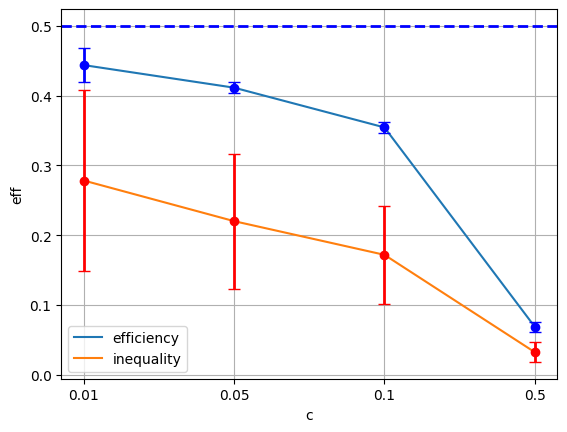

In [14]:
ax = sns.lineplot(x='c',y='eff',data=df_c, label='efficiency')
ax.axhline(y=Th, color='blue', linestyle='--', linewidth=2)
plt.errorbar(x=df_c['c'], y=df_c['eff'], yerr=df_c["eff_er"], fmt='o', color='blue', ecolor='b', elinewidth=2, capsize=4)
sns.lineplot(x='c',y='ineq',data=df_c, label='inequality')
plt.errorbar(x=df_c['c'], y=df_c['ineq'], yerr=df_c["ineq_er"], fmt='o', color='red', ecolor='r', elinewidth=2, capsize=4)
plt.grid()
plt.savefig(plot_folder+'eff_ineq_vs_C.png')